# Binomial Tests of Hypothesies

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


plt.style.use('ggplot')

## Objectives
#### The difference between probility and statistics
    In probability we know the parameters of a distribution. We can We can use these properties to predict the probability of an event.
    In statistics we just have data , and we would like to infer properties of its distribution.
#### Process of Hypothesis Testing
    Step 1: State the Null Hypothesis
    Step 2: State the Alternative Hypothesis
    Step 3: Set 𝛼
    Step 4: Collect Data
    Step 5: Calculate a test statistic(p-value).
    Step 6: Construct Acceptance / Rejection regions
    Step 7: Based on steps 5 and 6, draw a conclusion about H0
#### What is p-value?
    The P value is the probability you see a result at least as extreme as the sample result randomly when you assumed your null hypothesis is true.
    

## Probability vs. Statistics

Probability and Statistics are closely related subjects, but there is a fundamental difference.

### Probability

In **probability** we *know* the parameters of a distribution (associated with some random variable), and we would like to study properties of data generated from that distribution.

Example properties of random variables are:

The **expectation** of a random variable is defined by:

$$ E[X] = \int_{- \infty}^{\infty} t \
f_{X}(t) dt $$

and the **variance** is defined by

$$ V[X] = E \left[ (X - E[X])^2 \right] $$

If you *know* the parameters of the distribution, then you can *compute* the mean and variance.

### Statistics

In **statistics** we have data generated from a random variable, and we would like to *infer* properties of its distribution.

A few points are evident:

  - Independent and identically distributed data are important, as they allow us to pool information using data all generated from *indistinguishable* random variables.
  - We can never know *exactly* the distribution that generated the data, we can only hope to approximate it.
  - We *may* be able to quantify the uncertainty in our approximation (this is what much of classical statistics is about).

**Question**: Statistics, in its early days, was called **inverse probability**.  Can you see why?

## Example: Fisher's Tea Experiment

[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)'s friend [Muriel Bristol](https://en.wikipedia.org/wiki/Muriel_Bristol) claims that she can tell, by actually drinking the beverage, whether milk was poured in first or second into a cup of tea.  I.e. tea into the milk, or milk into the tea.

Fisher, being an upstanding skeptic, is skeptical, so devises an experiment to test her claim.

**Discussion:** How could we determine whether Muriel is telling the truth?

Fisher's solution is as follows.  He prepares six cups of tea, three with tea first and three with milk first. These cups are then given to Muriel arranged in a random order.

**Note:** For simplicity, I'll assume in my version that Muriel does *not know* that there are three of each. In the original experiment, she does know.

He has Muriel drink each beverage, and attempt to guess if tea or milk were poured first.  Her results are as follows

| Cup | Result    |
|----:|----------:|
| 1   | Correct   |
| 2   | Correct   |
| 3   | Correct   |
| 4   | Incorrect |
| 5   | Correct   |
| 6   | Correct   |

Fisher, remember, is a skeptic.  He is predisposed to **not** believe Muriel.  So he makes the skeptical hypothesis:

> Fisher's Hypothesis: Muriel has *no* ability to tell milk into tea from tea into milk.  Therefore, each of her answers is completely random.

Fisher now asks himself an important question:

> Given that my hypothesis is correct, **how surprising is this data?**

Let's take Fisher's hypothesis seriously.  If he is correct, what should we expect the data we observe to look like?

Well, under this hypothesis, the chances of Muriel getting any single cup correctly is $0.5$.   That is, if Fisher is correct, the data we observed would be generated by a simple sequence of coin flips.

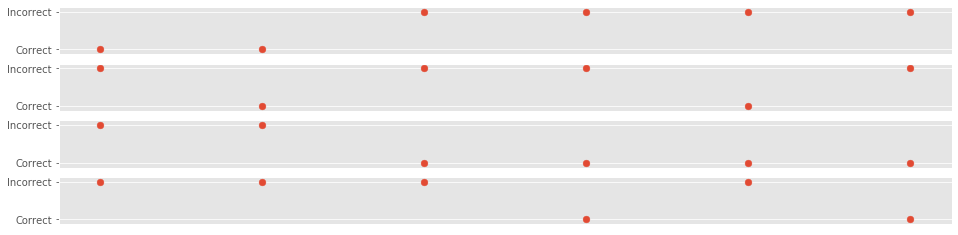

In [2]:
bernoulli = stats.bernoulli(p=0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 4))
for i, ax in enumerate(axs.flatten()):
    results = bernoulli.rvs(6)
    ax.scatter(range(1, 7), results, s=45)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Correct", "Incorrect"])
    ax.set_xticks(())

Instead of considering the specific sequence of correct or incorrect answers, it seems more natural to consider the **number** of correct and incorrect answers.

**Question:** What is the distribution of the number of correct answers by Muriel under Fisher's hypothesis?

If Fisher is correct, and Muriel's answers are totally random, then the distribution of the number of cups Muriel gets correct is a Binomial distribution

$$\text{# of cups guessed correctly} \sim \text{Binomial} (n=6, p=0.5)$$

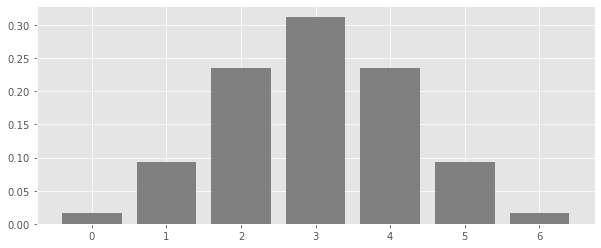

In [3]:
binomial = stats.binom(n=6, p=0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.bar(range(7), [binomial.pmf(i) for i in range(7)], color="grey")

Muriel guessing all but one correctly seems like an extremely surprising event given this assumption.  We can characterize our **degree of surprise in the data given our assumption** by calculating the following probability:

$$ P(\text{Observing this Data} \mid \text{Fisher's Assumption})$$

In our example, we can actually calculate this probability exactly from the binomial distribution.

$$ P(\text{Observing this Data} \mid \text{Fisher's Assumption}) = {{6}\choose{5}} 0.5^6 $$

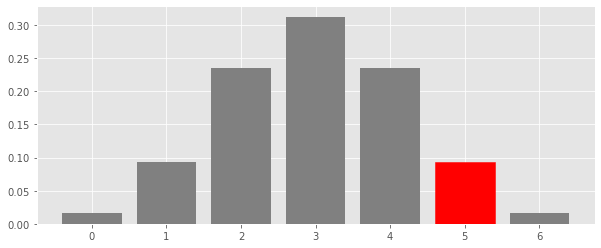

In [4]:
bernoulli = stats.binom(n=6, p=0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [bernoulli.pmf(i) for i in range(7)], align="center", color="grey")
bars[5].set_color('red')

Fisher observed that, in fact, he would have been surprised if he had observed this data **or any data even more extreme than this**, so a more correct measure of surprise would be

$$ P(\text{Observing Data As Or More Extreme} \mid \text{Fisher's Assumption}) = {{6}\choose{5}} 0.5^6 +{{6}\choose{6}} 0.5^6  $$

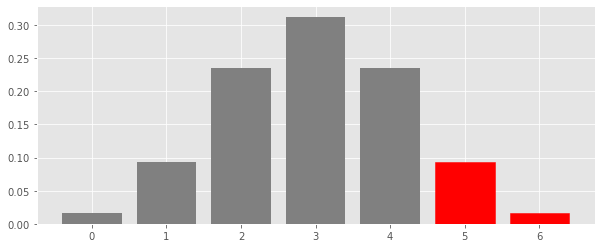

In [5]:
binomial = stats.binom(n=6, p=0.5)

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [binomial.pmf(i) for i in range(7)], align="center", color="grey")
bars[5].set_color('red')
bars[6].set_color('red')

We can calculate this number easily in python.

In [6]:
binomial = stats.binom(n=6, p=0.5)

# CDF gives P(draw <= value)
prob_equal_or_more_extreme = 1 - binomial.cdf(4)
print("Probability of Observing Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data More Equal or More Extreme than Actual: 0.11


We now have a different sort of problem, how do we *interpret* this level of suprise?  Are we suprised of not?

**Vote:** Do you believe Muriel given this evidence?

## Hypothesis Testing: The Big Picture

The tea example was reported in Fisher's classic text *The Design of Experiments*, and it is a prototypical example of the logic behind Hypothesis testing.





### State a scientific question.

State a scientific question (a yes/no question) of interest that can be answered with data that you have collected or intend to collect.

In Fisher's tea experiment the scientific question is 

> Can Muriel identify milk into tea from tea into milk?

### Take a skeptical stance, and clearly state this hypothesis.

The skeptic's stance is called the **null hypothesis**.

In Fisher's experiment, the null hypothesis is 

> Muriel cannot tell the difference, and hence is guessing at random.

### State the opposite of your skeptical hypothesis.

The opposite of the null hypothesis is called the **alternate hypothesis**.  It **must** be the exact opposite of the null, so that the null and the alternate cover *all* possibilities.

Our alternative hypothesis in the Tea case is:

> Muriel is not guessing randomly.

**Note:** This covers two cases!  On one hand, Muriel *could* be better than chance, but Muriel could also be worse!  We will discuss how to deal with this possible issue shortly.

### Define a *test statistic* to measure the how surprising our results are.

The **test statistic** is a single variable, a function of our results, that we can use to measure how extreme our results are. In this case the obvious single variable is

$$\text{# of cups guessed correctly}$$

Although that is true for many simple cases, for others the it is not obvious.

### Create a probabilistic model of the situation assuming the null hypothesis is true.

The null hypothesis generally states that some process is governed by only chance, so conceptualize exactly how the data is being generated probabilistically.

In Fisher's example, our probabilistic model is

$$\text{# of cups guessed correctly} \mid \text{Muriel is guessing randomly}\sim \text{Binomial}(n=6, p=0.5)$$

### Decide how surprised you need to be to reject your skeptical assumption.

Before looking at any data, set a threshold for you skepticism, which is traditionally labeled $\alpha$.  This threshold can be based on many considerations.

We neglected to do this in our tea example.

**Note:** It is a common practice to set a threshold of $\alpha = 0.05$ with no thought of reflection.  This is a source of much consternation in statistical circles, and you should not do so without reflection.

### Collect your data.

![Big Data](images/bigdata.jpg)

### Calculate the probability of finding a result equally or more extreme than actually observed assuming the null hypothesis is true.

This calculated conditional probability is called the **p-value**.

In Fisher's example, the calculated p-value is:

$$ P(\text{Observing Data As Or More Extreme} \mid \text{Null Hypothesis}) = {{6}\choose{5}} 0.5^6 + {{6}\choose{6}} 0.5^6  $$

### Compare the p-value to your stated rejection threshold.

If the p-value is smaller than your rejection threshold, you must reject your null hypothesis as **inconsistent with the data you collected**.

That is, you have demonstrated, to your stated tolerance, that your skeptical stance is unlikely to be true.

A useful way to think of this is:

  - **Skeptical Stance**: I will act as if my skeptics stance is true.
  - **Alternate Stance**: I will act as if my skeptics stance is not true.
  
In the case that your computed p-value is smaller than your stated threshold, you must act as if the skeptic's hypothesis is **not true** (though, of course, it may very well be and you just got unlucky).

### Publish your data and code online with explicit instructions for replicating your result.

![Github Cats](images/github-cats.jpg)

### Comments

If you happen to *not* find sufficient evidence to reject your null hypothesis, **you have not proven that your null hypothesis is true**.

Indeed, the entire procedure was predicated on **assuming** the null was true **until sufficient evidence is found to make this stance untenable**.  If you do not reject the null, you simply continue to hold this skeptic's stance until more evidence comes along and you need to re-evaluate.

## One-sample exact test of population proportion

This kind of test, where we are studying how many times something happens and the null distribution is binomial, is called a **one-sample exact test of a population proportion**.

Let's do another example to get reps on the idea.

### Setup

Matt is all about consistency in skateboarding, and is learning to Kickflip.  He does not want to move onto another trick until he can cleanly land a Kickflip $80\%$ of the time.

Being a scientist, he is skeptical of himself, and assumes the following hypothesis until he can prove otherwise:

> Null Hypothesis: $P(\text{I Land a Kickflip}) < 0.8$

On a particularly uneventful Saturday, Matt keeps track of $100$ kickflip attempts (after properly warming up and stretching of course, Matt is 36).  He does quite well, and lands $84$ of them.

**Question:** Should Matt move on to another trick?

### Define a *test statistic* to measure the how surprising our results are.

The test statistic in this case is the number of kickflips Matt manages to land. It's a single number that expresses what we are trying to measure.

### Create a probabilistic model of the situation assuming the null hypothesis is true.

We would like to create a probabilistic model of my Kickflip ability under the null hypothesis that

> Null Hypothesis: $P(\text{I Land a Kickflip}) \leq 0.8$

But this is kind of hard, because I don't have a single probability to rely on.  But consider my intent, to **be as skeptical as possible**.  If I base my model on, say, a probability of $0.5$, then it is **easier to collect data that is inconsistent with this probability**.  So, given my setup, I should use the probability that allows me to be **most skeptical**.  

If I assume that:

> Null Hypothesis': $P(\text{I Land a Kickflip}) = 0.8$

This allows me to be **maximally skeptical**.  It is **most difficult** to reject the null if I use a probability of $0.8$.

What I really want now is to know the probability I land $k$ out of $100$ kickflips.  To get there, I need to make one additional assumption: that each kickflip is independent of the rest.  This allows me to come up with a full probabilistic model under the Null:

$$ \text{# of kickflips landed } \mid \text{ Null Hypothesis} \sim \text{Binomial}(n=100, p=0.8) $$

Text(0.5, 1.0, '# of Kickflips Landed Under The Null Hypothesis')

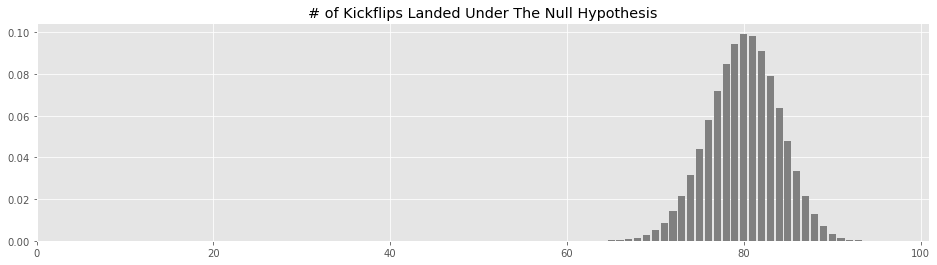

In [7]:
binomial = stats.binom(100, 0.8)

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pmf(i) for i in range(101)], align="center", color="grey")
ax.set_xlim(0, 101)
ax.set_title("# of Kickflips Landed Under The Null Hypothesis")

### Decide how surprised you need to be to reject your skeptical assumption

Rejecting the null hypothesis here incorrectly is not particularly harmful, as it just means I get to start working on another trick without being super confident in my kickflips.  So I'll set my rejection threshold rather high, let's take 

$$ \alpha = 0.2 $$

### Collect your data.

![Kickflip](images/kickflip.jpg)

Matt landed 84 of 100 kickflips. Note that we should have done all the earlier steps before gathering data.

### Calculate the probability of finding a result equally or more extreme than actually observed assuming the probabilistic model you created.

This is almost the same calculation as the tea example.

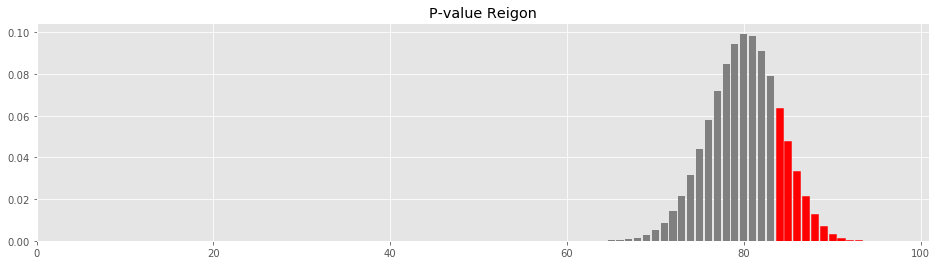

In [8]:
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pmf(i) for i in range(101)], color="grey", align="center")
ax.set_xlim(0, 101)

for i in range(84, 101):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

In [9]:
prob_equal_or_more_extreme = 1 - binomial.cdf(83)
print("Probability of Observing Data More Equal or More Extreme than Actual: {:2.2}".format(
    prob_equal_or_more_extreme))

Probability of Observing Data More Equal or More Extreme than Actual: 0.19


### Compare the p-value to your stated rejection threshold.

We decided to reject at a threshold of $\alpha = 0.2$.  Since our p-value is less than this threshold, I can now work on some new tricks!

**Exercise**: Redo the example with a sample size of 250 kickflips, in which he 210 of them landed (this is the same *proportion* of lands).  How does the p-value change?

In [4]:

binomial2 = stats.binom(250, 0.8)
p_vaule2 =1-binomial2.cdf(209)
print(f"p_value is: {p_vaule2}")

p_value is: 0.06368363842355484
